In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import itertools

import pydotplus
from IPython.display import Image

Iris data

In [4]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.shape

(150, 4)

In [6]:
iris_df['Target'] = iris.target

In [7]:

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
X = iris.data
y = iris.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Train data

In [10]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Test

In [11]:
y_pred = clf.predict(X_test)

In [12]:
print(pd.crosstab(iris.target_names[y_test], iris.target_names[y_pred], rownames=['Actual y'], colnames=['prediction']))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


prediction  setosa  versicolor  virginica
Actual y                                 
setosa          16           0          0
versicolor       0          17          1
virginica        0           0         11
Accuracy: 0.98


Visualization

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True,  rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

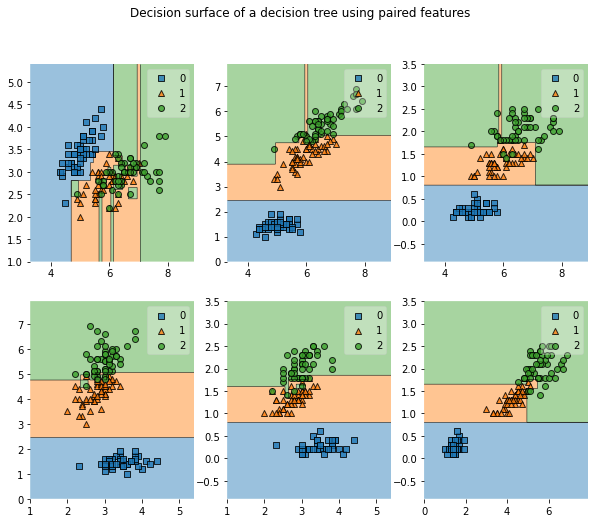

In [ ]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)
    ax = plt.subplot(2,3,pairidx+1)
    fig = plot_decision_regions(X=X, y=y, clf=clf)
plt.suptitle("Decision surface of a decision tree using paired features")
plt.show()

In [ ]:
file = open('./breast-cancer-wisconsin.data', 'r')

_drop = []
_list = []
for line in file.readlines():
  
  if '?' not in line:
    _list.append(list(map(int, line.split('\n')[0].split(','))))
  else:
    _drop.append(line.split('\n')[0].split(',')[0])

file.close()

FileNotFoundError: ignored

In [ ]:
data = pd.DataFrame(_list
                    , columns = ["id", "clump_thickness", "uniformity_of_cell_size", "uniformity_of_cell_shape",
                                 "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei", "bland_chromatin",
                                 "normal_necleoli", "mitoses", "class"])
data.shape

In [ ]:
# data.to_csv('./Breast_cancer_Wisconsindata.txt', sep = '\t', index = False)

In [ ]:
data = pd.read_csv('./Breast_cancer_Wisconsindata.txt', sep = '\t')

In [ ]:
data.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_necleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
X = data.iloc[:,1:-1]
y = data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# print(pd.crosstab(iris.target_names[y_test], iris.target_names[y_pred], rownames=['Actual y'], colnames=['prediction']))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 0.94


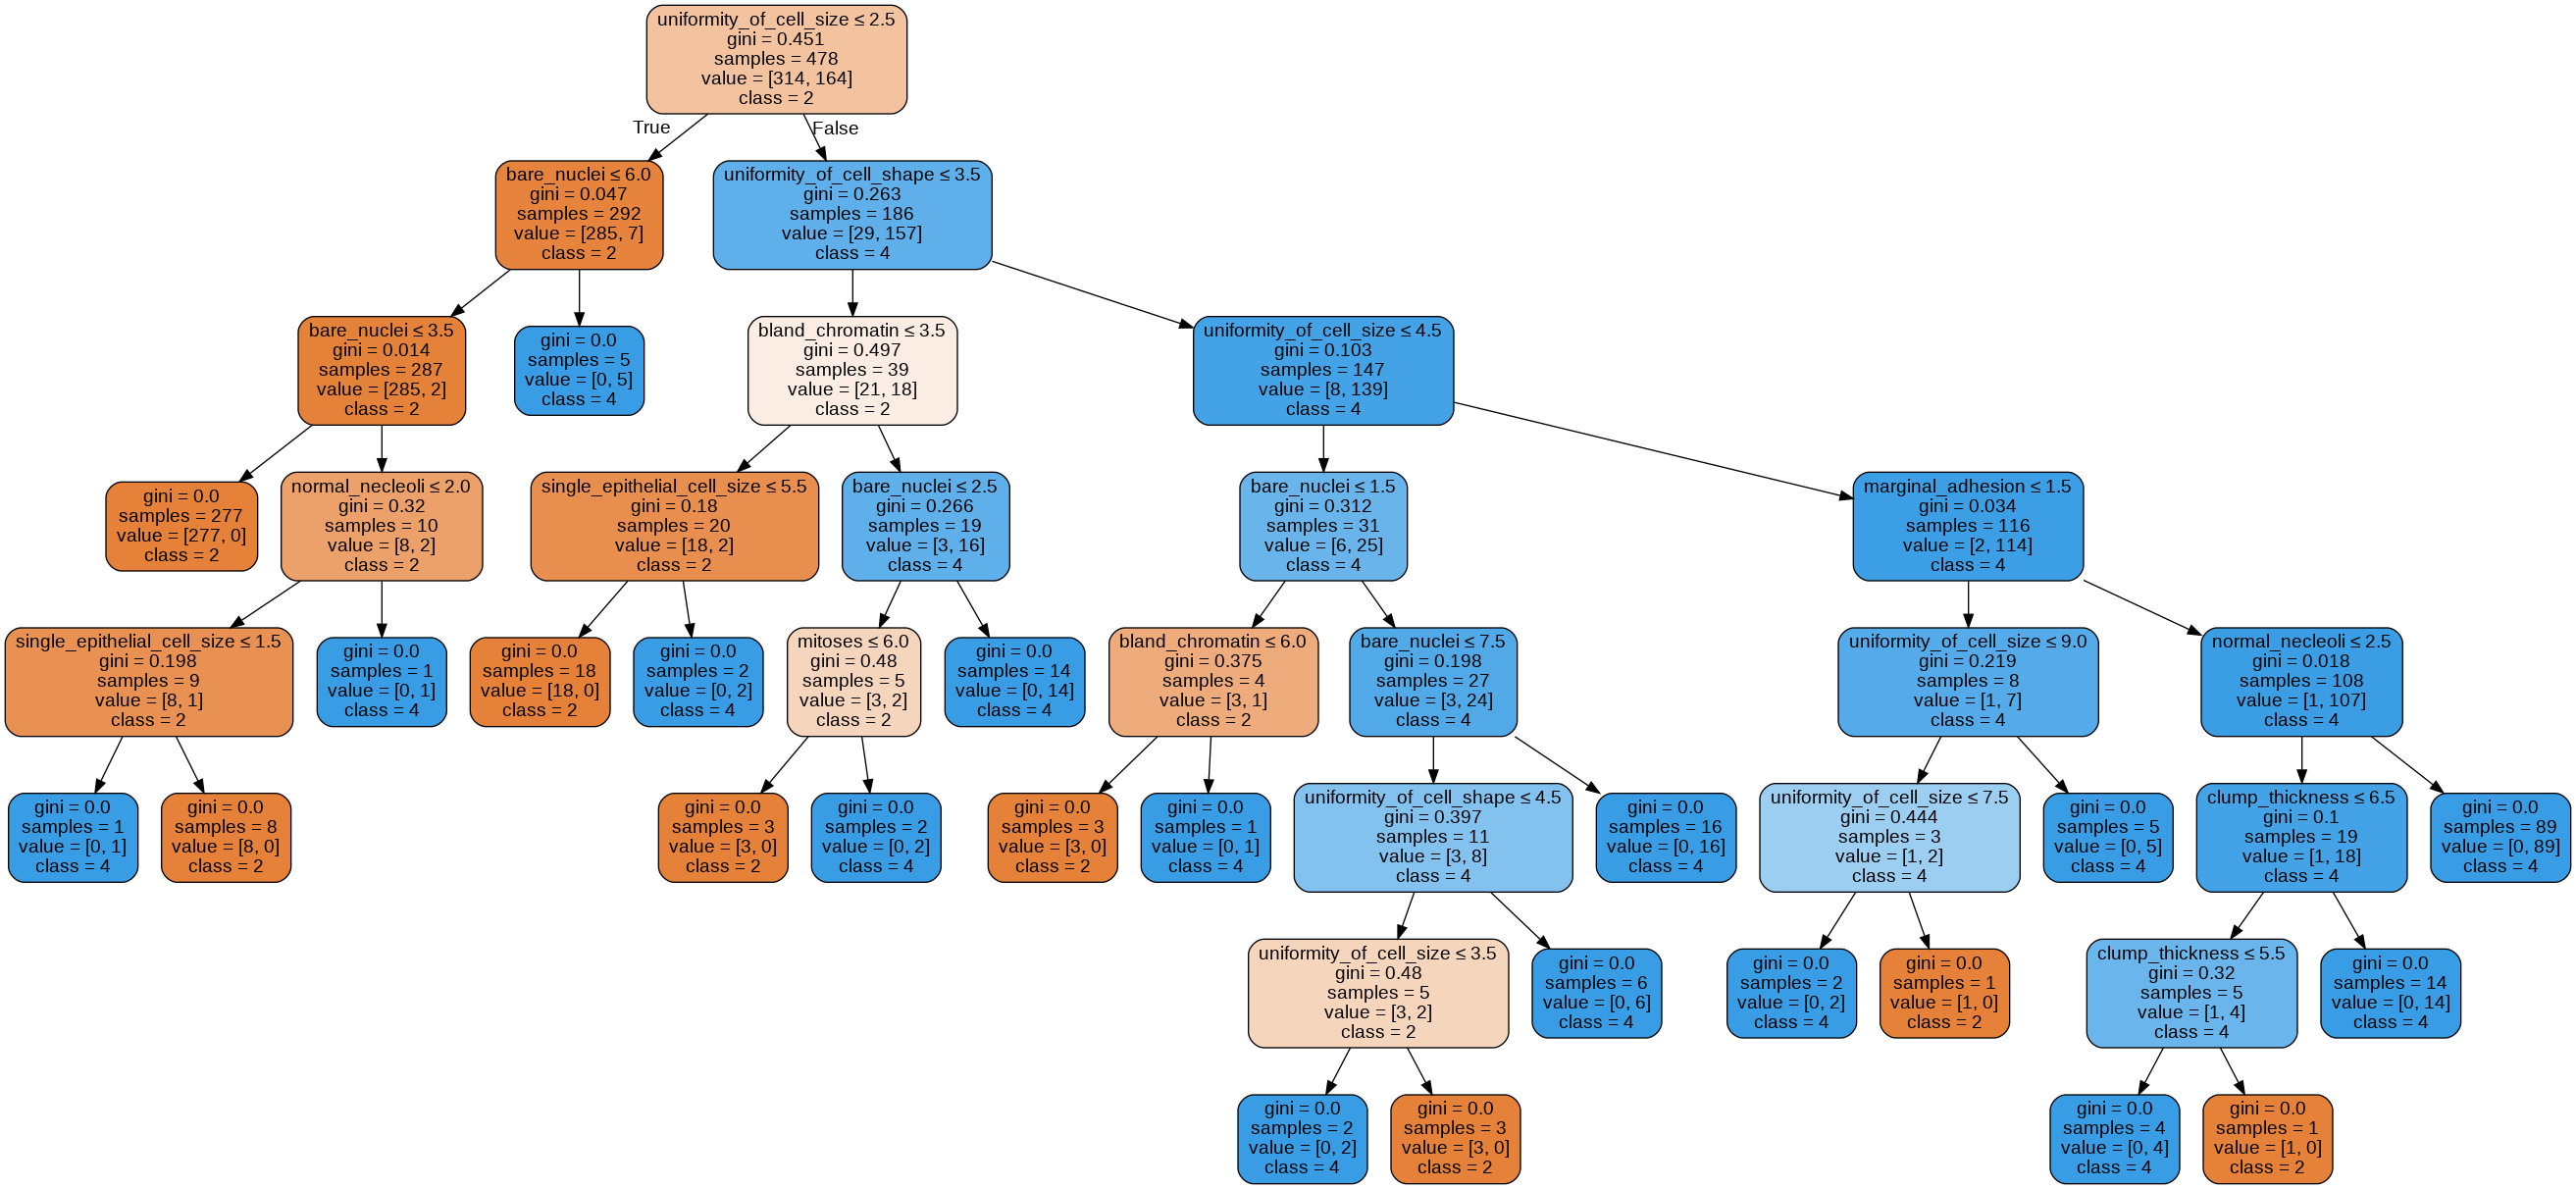

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(data.columns)[1:-1],
                          class_names=(data['class'].unique()).astype('str'), filled=True,  rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [ ]:
importances = clf.feature_importances_ 
print(importances)

[0.02644548 0.32353464 0.18639932 0.03011765 0.1185269  0.12155691
 0.13171621 0.05594695 0.00575593]


In [ ]:
from sklearn.tree import export_graphviz

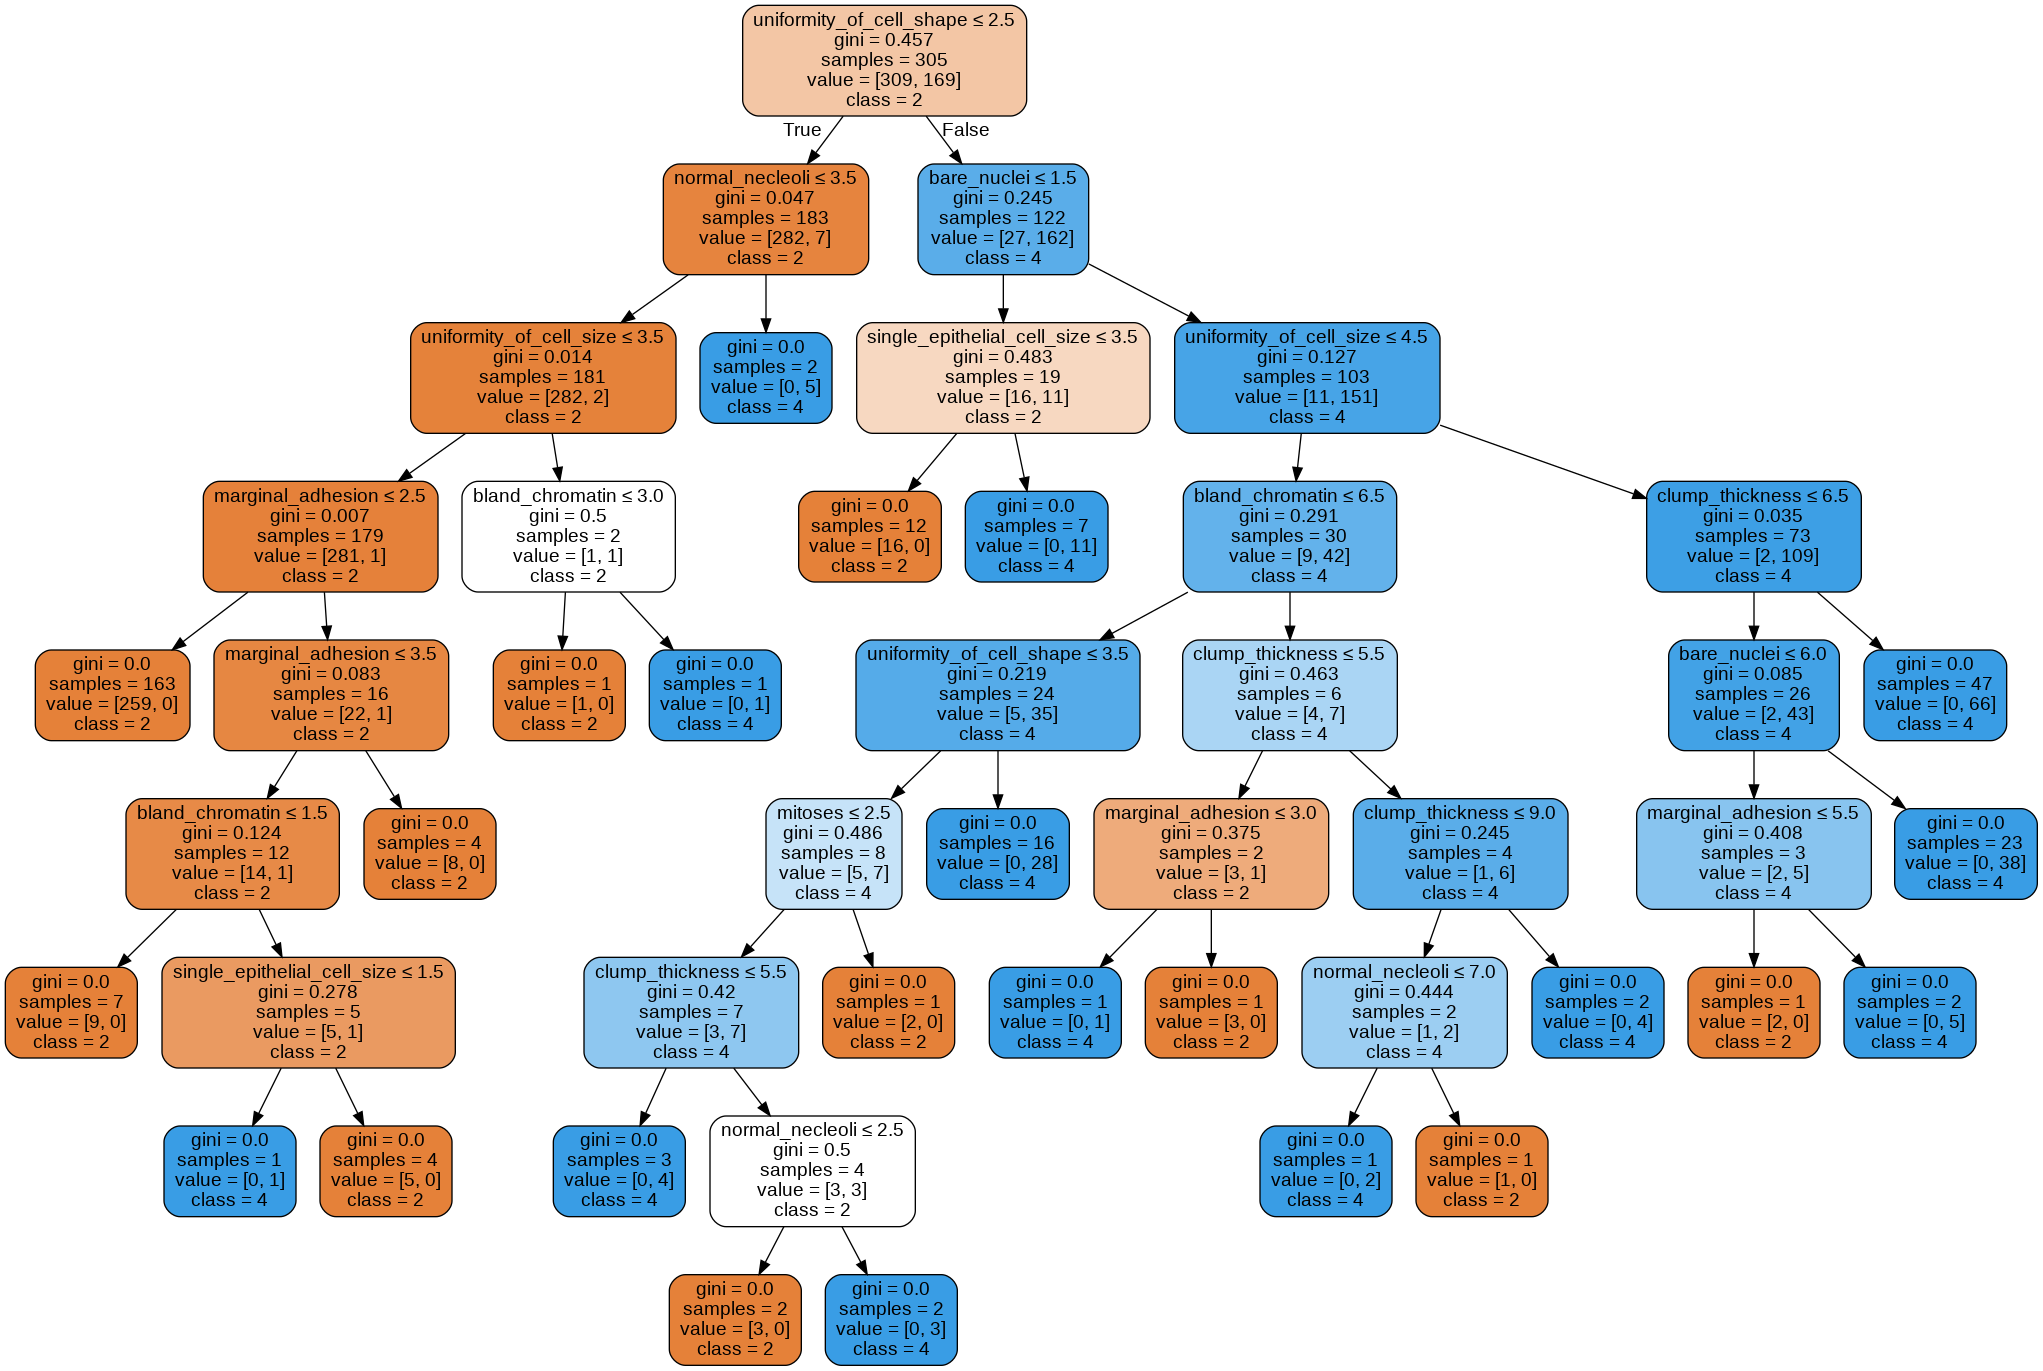

In [ ]:
tree = clf.estimators_[9]

dot_data = export_graphviz(tree, out_file=None, feature_names=list(data.columns)[1:-1],
                          class_names=(data['class'].unique()).astype('str'), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(data.columns)[1:-1],
#                           class_names=(data['class'].unique()).astype('str'), filled=True,  rounded=True, special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())